In [ ]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from google.colab import drive
import sklearn.datasets
from sklearn import *
import random
random.seed(0)

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/"

'  (1).txt'
 29A69B82-1F56-4160-B054-188D16CA9E1F.png
 2-Amortized-Analysis.gdoc
'  (2).txt'
 3366222C-7941-4393-B30D-FA95CD1D817A.png
 ACN
 Attendance.gsheet
 Chapter_1.gslides
'Chapter_2 (1).gslides'
'Chapter_2 (2).gslides'
'Chapter_2 (3).gslides'
'Chapter_2 (4).gslides'
'Chapter_2 (5).gslides'
'Chapter_2 (6).gslides'
'Chapter_2 (7).gslides'
 Chapter_2.gslides
'Chapter_3 (1).gslides'
'Chapter_3 (2).gslides'
'Chapter_3 (3).gslides'
'Chapter_3 (4).gslides'
 Chapter_3.gslides
'Chapter_4 (1).gslides'
'Chapter_4 (2).gslides'
'Chapter_4 (3).gslides'
'Chapter_4 (4).gslides'
'Chapter_4 (5).gslides'
'Chapter_4 (6).gslides'
'Chapter_4 (7).gslides'
'Chapter_4 (8).gslides'
 Chapter_4.gslides
'Chapter_5 (1).gslides'
'Chapter_5 (2).gslides'
'Chapter_5 (3).gslides'
'Chapter_5 (4).gslides'
 Chapter_5.gslides
 Classroom
'Colab Notebooks'
'Copy of 20220918_230353.jpg'
'CS2233-Data Structures- Marks List.gsheet'
 CS22MTECH11017_A1_Wireshark.gdoc
 CS22MTECH11017_A5.gdoc
 CS22MTECH11017_ACN.gdoc
'DS Assi

***3. Consider the regression dataset at https://archive.ics.uci.edu/ml/datasets/DrivFace. Process this data in standard format of input-label pairs. Then split this dataset into two random halves. Use the first as training and second as the test set. Report the explained variance on test set for regressor obtained using scikit Linear Regression class trained using the training half. In this case, note that the inputs are already in Euclidean space, so please try the identity feature map i.e. phi(x) = x. Also try, phi(x) = [1 x x^2]. It is enough if you submit these two numbers for the explained variance obtained with the given feature maps. Please do NOT submit any code.***

In [ ]:
#importing mat file
img_data = scipy.io.loadmat("drive/My Drive/ML/DrivFace.mat")
drivFaceData = img_data['drivFaceD'][0]

In [ ]:
X_raw = img_data['drivFaceD'][0][0][0]
print(X_raw.shape)

(606, 6400)


In [ ]:
#reading dataset
label_data = pd.read_csv("drive/My Drive/ML/drivPoints.txt", sep=",")

In [ ]:
print(label_data.head(5))

                  fileName  subject  imgNum  label  ang   xF   yF   wF   hF  \
0  20130529_01_Driv_001_f         1       1      2    0  292  209  100  112   
1  20130529_01_Driv_002_f         1       2      2    0  286  200  109  128   
2  20130529_01_Driv_003_f         1       3      2    0  290  204  105  121   
3  20130529_01_Driv_004_f         1       4      2    0  287  202  112  118   
4  20130529_01_Driv_005_f         1       5      2    0  290  193  104  119   

   xRE  yRE  xLE  yLE   xN   yN  xRM  yRM  xLM  yLM  
0  323  232  367  231  353  254  332  278  361  278  
1  324  235  366  235  353  258  333  281  361  281  
2  325  240  367  239  351  260  334  282  362  282  
3  325  230  369  230  353  253  335  274  362  275  
4  325  224  366  225  353  244  333  268  363  268  


In [ ]:
X_raw

In [ ]:
yF = label_data['yF']
print(len(yF))

606


In [ ]:
#hF

In [ ]:
#splitting dataset into train data and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_raw, yF, train_size = 0.5, random_state = 42)

In [ ]:
print("x_train.shape :", x_train.shape)
print("y_train.shape :", y_train.shape)
print("x_test.shape :", x_test.shape)
print("y_test.shape :", y_test.shape)

x_train.shape : (303, 6400)
y_train.shape : (303,)
x_test.shape : (303, 6400)
y_test.shape : (303,)


In [ ]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#model building
linReg = LinearRegression()


In [ ]:
linReg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#model prediction
y_pred=linReg.predict(x_test)

In [ ]:
#These options determine the way floating point numbers, arrays and other NumPy objects are displayed.
np.set_printoptions(precision = 2)


In [ ]:
#Join a sequence of arrays along an existing axis.
np.concatenate([y_test, y_pred], axis=0)

In [ ]:
#used to measure the discrepancy between a model and actual data. 
#Higher percentages of explained variance indicates a stronger strength of association. It also means that you make better predictions
from sklearn.metrics import explained_variance_score

In [ ]:
#calculating explained variance
explained_variance_score(y_test, y_pred)

0.5816977239022936

**Now, Phi(x)=[1 x x^2]**

In [ ]:
#transforming x into feature map i.e: phi(x) 
x_train_phi = np.concatenate((np.ones((303,1)), x_train, x_train**2), axis=1)
x_test_phi = np.concatenate((np.ones((303,1)), x_test, x_test**2), axis=1)


In [ ]:
#check shape
print("shape of x_train_phi:",x_train_phi.shape)
print("shape of x_test_phi:",x_test_phi.shape)

shape of x_train_phi: (303, 12801)
shape of x_test_phi: (303, 12801)


In [ ]:
# Standardize the input feature 'X'
# It helps to normalize the data within a particular range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
# Standardize the feature map 'X'
x_train_phi = sc.fit_transform(x_train_phi)
x_test_phi = sc.fit_transform(x_test_phi)

In [ ]:
#model
linReg.fit(x_train_phi,y_train)

LinearRegression()

In [ ]:
#predict using test data
y_pred1=linReg.predict(x_test_phi)

In [ ]:
np.concatenate([y_test, y_pred1])

In [ ]:
#calculating explained variance
explained_variance_score(y_test, y_pred1)

0.6055059831207308

4. This is a simulation based problem:
  ***a) Generate 2m samples from your favourite d-dimensional distribution (say d-dim multivariate Gaussian)***

In [ ]:
# 5-dimensional distribution
d = 5
# data of 2*1000 samples (m = 1000)
m = 1000
mean = np.random.rand(d)
#A = np.random.randint(1, 2*m + 1, size = (d, ))
covariance = np.eye(d)


In [ ]:
# Print mean and covariance matrix
print("mean :", mean)
print("covariance :", covariance)

mean : [1.   0.1  0.06 0.87 0.11]
covariance : [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
# create 2m samples from normal distribution having above mean and covariance
X = np.random.multivariate_normal(mean = mean, cov = covariance, size = 2 * m)

In [ ]:
print("X.shape : ", X.shape)
X

X.shape :  (2000, 5)


array([[-0.1 ,  0.49,  1.01,  0.3 ,  0.86],
       [ 1.3 ,  0.19,  1.07,  1.22, -0.99],
       [ 1.02, -0.61, -0.74,  1.19,  0.65],
       ...,
       [ 0.11, -0.65, -0.24,  1.87, -0.22],
       [ 0.4 ,  0.55,  0.92, -0.9 ,  0.2 ],
       [ 2.65,  0.42,  0.68, -1.17,  1.06]])

In [ ]:
w = np.random.rand(X.shape[0])
print(w.shape)
w.T.dot(X)

(2000,)


array([992.56, 130.  ,  78.84, 844.72, 104.84])

In [ ]:
# create 2*m output labels from normal distribution having above mean as w.T and covariance as 1
y = np.random.multivariate_normal(mean = w.T.dot(X), cov = covariance, size = 2 * m)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = m, random_state = 42)

In [ ]:
# Print the shape of each df
print("X_train.shape :", X_train.shape)
print("y_train.shape :", y_train.shape)
print("X_test.shape :", X_test.shape)
print("y_test.shape :", y_test.shape)

X_train.shape : (1000, 5)
y_train.shape : (1000, 5)
X_test.shape : (1000, 5)
y_test.shape : (1000, 5)


In [ ]:
# Standardize the input feature 'X'
# It helps to normalize the data within a particular range
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()

In [ ]:
# Fit the training data (i.e. model training) with phi(x) = x
linReg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict the labels for testing data
y_pred = linReg.predict(X_test)

In [ ]:
# Print the true and predicted labels
np.concatenate([y_test, y_pred], axis = 1)

array([[993.75, 131.06,  79.45, ...,  78.85, 844.71, 104.84],
       [994.01, 129.65,  79.58, ...,  78.8 , 844.83, 104.81],
       [993.49, 130.7 ,  79.21, ...,  78.86, 844.85, 104.82],
       ...,
       [992.54, 129.66,  78.57, ...,  78.86, 844.78, 105.  ],
       [992.98, 129.7 ,  78.71, ...,  78.86, 844.91, 104.96],
       [993.49, 130.5 ,  78.81, ...,  78.83, 844.83, 104.73]])

In [ ]:
# Print the explained variance score
explained_variance_score(y_test, y_pred)

-0.005976345272978545

**(b) With each such `input' sample, x, obtain a `label', y, by sampling
from N (w>x; 1). Here, w is your favourite (any) vector! This will
create 2m pairs of input-labels. Arbitrarily call m of these as the
training set D and the remaining as the test set T **bold text****

**2.2.1.Consider the binary classi cation dataset at https://archive.ics.uci.edu/ml/datasets/LSVT+Voice+Rehabilitation. Process this data in
standard format of input-label pairs. Then split this dataset into two
random halves. Use the rst as training and second as the test set. Re-
port the classifcation accuracy on test set for the classi er obtained using
(both of the following): (a) scikit Perceptron class** 

In [ ]:
#read xlsx file
data = pd.read_excel("drive/My Drive/ML/LSVT_voice_rehabilitation.xlsx")
data.head(5)

,Jitter->F0_abs_dif,Jitter->F0_dif_percent,Jitter->F0_PQ5_classical_Schoentgen,Jitter->F0_PQ5_classical_Baken,Jitter->F0_PQ5_generalised_Schoentgen,Jitter->F0_abs0th_perturb,Jitter->F0_CV,Jitter->F0_TKEO_mean,Jitter->F0_TKEO_std,Jitter->F0_TKEO_prc5,...,det_TKEO_std4_1_coef,det_TKEO_std4_2_coef,det_TKEO_std4_3_coef,det_TKEO_std4_4_coef,det_TKEO_std4_5_coef,det_TKEO_std4_6_coef,det_TKEO_std4_7_coef,det_TKEO_std4_8_coef,det_TKEO_std4_9_coef,det_TKEO_std4_10_coef
0,0.088112,0.041697,0.000480,-3.723304e-06,0.000422,2.458381,6.332164e-07,47.021079,1366.430390,-7.103323,...,2.527583,7.088978,19.753255,54.335046,145.528630,375.097397,921.296579,2137.079844,4697.131077,9931.208257
1,0.161798,0.057364,0.000677,5.466365e-06,0.000206,2.592066,7.228518e-07,93.557936,2582.922776,-23.284761,...,2.841881,7.977363,22.203504,60.993338,163.560972,421.010306,1036.092589,2404.072562,5284.082128,11165.095662
2,0.554508,0.642913,0.007576,-7.443871e-07,0.006488,12.691326,6.946246e-04,52.988422,466.682635,-45.308680,...,1.806103,5.078616,14.135923,38.641654,103.466808,264.654626,649.657090,1507.384591,3315.804236,6974.600636
3,0.031089,0.027108,0.000314,-2.214722e-07,0.000216,0.754288,1.868647e-07,13.982754,417.217249,-1.207741,...,1.999637,5.610448,15.626164,42.943275,115.014975,296.320795,728.284936,1689.586636,3713.818933,7851.139360
4,0.076177,0.039071,0.000302,2.732106e-05,0.001102,1.270034,4.918186e-05,56.373996,1608.317410,-3.491990,...,2.453087,6.902199,19.117609,52.715873,141.113865,363.511021,893.246151,2071.625622,4554.204815,9623.566242


In [ ]:
data.shape

(126, 310)

In [ ]:
df1 = pd.read_excel("drive/My Drive/ML/LSVT_voice_rehabilitation.xlsx", 0)
df1

In [ ]:
df1.shape

(126, 310)

In [ ]:
df2 = pd.read_excel("drive/My Drive/ML/LSVT_voice_rehabilitation.xlsx", 1)
df2

,"Binary class 1=acceptable, 2=unacceptable"
0,1
1,2
2,2
3,1
4,2
...,...
121,2
122,2
123,1
124,2


In [ ]:
df2.shape

(126, 1)

In [ ]:
#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(df1, df2, test_size = 0.5, random_state = 42)
print("x_train.shape :", x_train.shape)
print("x_test.shape :", x_test.shape)
print("y_train.shape :", y_train.shape)
print("y_test.shape :", y_test.shape)

x_train.shape : (63, 310)
x_test.shape : (63, 310)
y_train.shape : (63, 1)
y_test.shape : (63, 1)


In [ ]:
scClf =  StandardScaler()
x_train = scClf.fit_transform(x_train)
x_test = scClf.fit_transform(x_test)

**Using Perceptron**

In [ ]:
#implementation of perceptron
from sklearn.linear_model import Perceptron
perceptronClf = Perceptron(max_iter=40,eta0=0.1)

In [ ]:
#fit the model to the standadized data
perceptronClf.fit(x_train, y_train.values.ravel())

Perceptron(eta0=0.1, max_iter=40)

In [ ]:
#make prediction
y_pred = perceptronClf.predict(x_test)
print(y_pred)

[1 1 2 2 2 1 1 2 1 2 2 2 1 1 1 1 2 2 2 2 1 2 2 1 2 2 2 1 2 1 1 1 2 2 1 1 1
 1 2 2 1 1 2 1 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 1 1 2 2]


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#finding accuracy
print("Accuracy using perceptron: {0:.4f}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy using perceptron: 79.3651%


In [ ]:
#explained variance
explained_variance_score(y_test, y_pred)

0.14186046511627892

**Using Logistic Reg**

In [ ]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
logiClf = LogisticRegression(penalty='none')

In [ ]:
logiClf.fit(x_train, y_train.values.ravel())

LogisticRegression(penalty='none')

In [ ]:
#make prediction
y_pred_log = logiClf.predict(x_test)
print(y_pred_log)

[1 2 2 2 2 1 2 2 1 2 2 2 1 2 1 1 2 2 2 2 1 2 2 1 2 2 2 1 2 1 1 1 2 2 1 1 1
 1 2 2 2 1 2 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1]


In [ ]:
#explained variance
explained_variance_score(y_test, y_pred_log)

0.28604651162790706

In [ ]:
print("Accuracy using LogisticReg: {0:.4f}%".format(accuracy_score(y_test, y_pred_log)*100))

Accuracy using LogisticReg: 84.1270%


**Now, Phi(x)=[1 x x^2]**

In [ ]:
#transforming x into feature map i.e: phi(x) 
x_train_phi = np.concatenate((np.ones((63,1)), x_train, x_train**2), axis=1)
x_test_phi = np.concatenate((np.ones((63,1)), x_test, x_test**2), axis=1)

In [ ]:
#check shape
print("shape of x_train_phi:",x_train_phi.shape)
print("shape of x_test_phi:",x_test_phi.shape)

shape of x_train_phi: (63, 621)
shape of x_test_phi: (63, 621)


In [ ]:
sc = StandardScaler()

In [ ]:
# Standardize the feature map 'X'
x_train_phi = sc.fit_transform(x_train_phi)
x_test_phi = sc.fit_transform(x_test_phi)

**Using Perceptron for phi**

In [ ]:
#using perceptron algo
perceptron_phiClf = Perceptron()

In [ ]:
#fit the model to the standadized data
perceptron_phiClf.fit(x_train_phi, y_train.values.ravel())

Perceptron()

In [ ]:
y_pred1 = perceptron_phiClf.predict(x_test_phi)
print(y_pred1)

[1 2 1 2 2 2 2 2 1 2 2 2 1 2 1 1 2 1 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 1 1 1
 1 2 2 1 1 2 1 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 1 1 2 1]


In [ ]:
#explained variance
explained_variance_score(y_test, y_pred1)

0.2511627906976748

In [ ]:
print("Accuracy using perceptron with phi: {0:.4f}%".format(accuracy_score(y_test, y_pred1)*100))

Accuracy using perceptron with phi: 82.5397%


**Using Logistic Regression for phi**

In [ ]:
logiClf.fit(x_train_phi,y_train.values.ravel())

LogisticRegression(penalty='none')

In [ ]:
y_pred1_log=logiClf.predict(x_test_phi)

In [ ]:
explained_variance_score(y_test, y_pred1_log)

0.3697674418604652

In [ ]:
print("Accuracy using logisticReg with phi: {0:.4f}%".format(accuracy_score(y_test, y_pred1_log)*100))

Accuracy using logisticReg with phi: 85.7143%


**2.3 Gradient Descent & SGD
1. In this problem, your goal is solve minv2R10 f (v), where f (v) = v>Av 
2b>v+c. Generate A randomly using sklearn.datasets.make spd matrix,
and generate b and c using np.random.rand function of numpy. Once you
obtain A; b; c, keep them xed for the entire problem. Solve this min.
problem using the following di erent methods: \**

In [ ]:
# d : dimensionality of vector v
d = 10
itr_gd = 1000
itr_sgd = 100000
A = sklearn.datasets.make_spd_matrix(d)
b = np.random.rand(d, 1)
c = np.random.rand(1)
v = np.array([0.1] * d).reshape(d, 1)
print("A.shape:", A.shape)
print("b.shape:", b.shape)
print("c.shape:", c.shape)
print("v.shape:", v.shape)
print(v)
print(v.T)

A.shape: (10, 10)
b.shape: (10, 1)
c.shape: (1,)
v.shape: (10, 1)
[[0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


In [ ]:
##f_v = v.T*A*v - 2*b.T*v + c --> Loss Function

In [ ]:
v_gd = []
v_gd.append(v)
loss_gd = []
learn_rate_gd = 1/((2*np.linalg.norm(A, ord = 2)) + np.linalg.norm(b))
for i in range(1, itr_gd + 1):
  f_v = np.dot(v_gd[i-1].T , np.dot(A, v_gd[i-1])) - (2 * np.dot(b.T, v_gd[i-1])) + c 
  loss_gd.append(f_v.reshape(1))
  grad_f_v = 2 * np.dot(A, v_gd[i - 1]) - 2 * b
  v_new = v_gd[i - 1] - learn_rate_gd * grad_f_v
  v_gd.append(v_new)

In [ ]:
loss_gd

[array([0.59]),
 array([0.38]),
 array([0.25]),
 array([0.13]),
 array([0.03]),
 array([-0.06]),
 array([-0.15]),
 array([-0.22]),
 array([-0.29]),
 array([-0.35]),
 array([-0.41]),
 array([-0.46]),
 array([-0.5]),
 array([-0.54]),
 array([-0.58]),
 array([-0.62]),
 array([-0.65]),
 array([-0.67]),
 array([-0.7]),
 array([-0.72]),
 array([-0.74]),
 array([-0.76]),
 array([-0.78]),
 array([-0.79]),
 array([-0.81]),
 array([-0.82]),
 array([-0.83]),
 array([-0.84]),
 array([-0.85]),
 array([-0.86]),
 array([-0.87]),
 array([-0.88]),
 array([-0.88]),
 array([-0.89]),
 array([-0.9]),
 array([-0.9]),
 array([-0.91]),
 array([-0.91]),
 array([-0.92]),
 array([-0.92]),
 array([-0.92]),
 array([-0.93]),
 array([-0.93]),
 array([-0.93]),
 array([-0.93]),
 array([-0.94]),
 array([-0.94]),
 array([-0.94]),
 array([-0.94]),
 array([-0.94]),
 array([-0.95]),
 array([-0.95]),
 array([-0.95]),
 array([-0.95]),
 array([-0.95]),
 array([-0.95]),
 array([-0.95]),
 array([-0.95]),
 array([-0.95]),
 array

In [ ]:
v_sgd = []
v_sgd.append(v)
loss_sgd = []
learn_rate_sgd = (1/100) * learn_rate_gd
for i in range(1, itr_sgd + 1):
  f_v = np.dot(v_sgd[i-1].T , np.dot(A, v_sgd[i-1])) - (2 * np.dot(b.T, v_sgd[i-1])) + c
  loss_sgd.append(f_v.reshape(1))
  grad_f_v = 2 * np.dot(A, v_sgd[i-1]) - 2 * b  
  rand_noise = 0.5 * np.random.randn(10).reshape((10, 1))
  v_new = v_sgd[i - 1] - learn_rate_sgd *  (grad_f_v + rand_noise)
  v_sgd.append(v_new)

In [ ]:
loss_sgd

[array([0.59]),
 array([0.59]),
 array([0.59]),
 array([0.58]),
 array([0.58]),
 array([0.58]),
 array([0.58]),
 array([0.57]),
 array([0.57]),
 array([0.57]),
 array([0.56]),
 array([0.56]),
 array([0.56]),
 array([0.56]),
 array([0.56]),
 array([0.55]),
 array([0.55]),
 array([0.55]),
 array([0.55]),
 array([0.54]),
 array([0.54]),
 array([0.54]),
 array([0.54]),
 array([0.54]),
 array([0.53]),
 array([0.53]),
 array([0.53]),
 array([0.52]),
 array([0.52]),
 array([0.52]),
 array([0.52]),
 array([0.52]),
 array([0.52]),
 array([0.51]),
 array([0.51]),
 array([0.51]),
 array([0.51]),
 array([0.51]),
 array([0.51]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.5]),
 array([0.49]),
 array([0.49]),
 array([0.49]),
 array([0.49]),
 array([0.49]),
 array([0.49]),
 array([0.48]),
 array([0.48]),
 array([0.48]),
 array([0.48]),
 array([0.48]),
 array([0.48]),
 array([0.47]),
 array([0.47]),
 array([0.47]),
 array([0.47]),
 array([0.47]),
 array([0.46]),
 array([0.46]

In [ ]:
v_optimal = np.dot(np.linalg.inv(A), b)
np.concatenate([v_optimal, v_gd[-1]], axis = 1)

array([[-0.49, -0.49],
       [ 0.88,  0.88],
       [ 1.06,  1.06],
       [ 0.32,  0.32],
       [-0.08, -0.08],
       [-0.19, -0.19],
       [ 0.34,  0.34],
       [ 0.35,  0.35],
       [ 0.91,  0.91],
       [ 0.34,  0.34]])

In [ ]:
f_v_optimal = np.dot(v_optimal.T, np.dot(A, v_optimal)) - 2 * np.dot(b.T, v_optimal) + c
f_v_optimal = f_v_optimal.reshape(1)
f_v_optimal

array([-0.97])

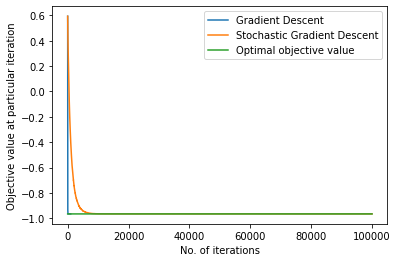

In [ ]:
plt.plot(np.arange(itr_gd), loss_gd, label = 'Gradient Descent')
plt.plot(np.arange(itr_sgd), loss_sgd, label = 'Stochastic Gradient Descent')
plt.plot(np.arange(itr_sgd), [f_v_optimal] * itr_sgd, label = 'Optimal objective value')
plt.xlabel("No. of iterations")
plt.ylabel("Objective value at particular iteration")
plt.legend()
plt.savefig('gd-sgd.png')

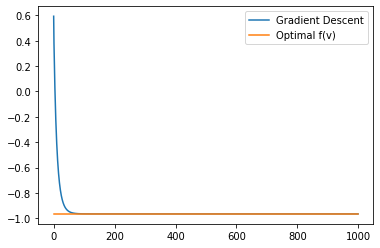

In [ ]:
X = np.arange(itr_gd)
plt.plot(X, loss_gd, label = 'Gradient Descent')
plt.plot(X, [f_v_optimal] * itr_gd, label = 'Optimal f(v)')
plt.legend()
plt.show()

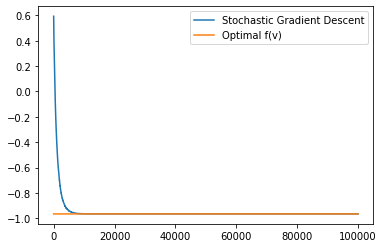

In [ ]:
X = np.arange(itr_sgd)
plt.plot(X, loss_sgd, label = 'Stochastic Gradient Descent')
plt.plot(X, [f_v_optimal] * itr_sgd, label = 'Optimal f(v)')
plt.legend()
plt.show()

 **(a) Analytically, by setting gradient to zero. (You can verify that f is
convex)**